In [1]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import os

In [1]:
p

/bin/bash: /home/luke/Desktop/AI: No such file or directory
Note: you may need to restart the kernel to use updated packages.


In [2]:
cwd = os.getcwd()

In [3]:
# filtering out just the labels that I will be using
df = pd.read_csv(os.path.join(cwd,os.pardir,'fer2013.csv'))
INTERESTED_LABELS = [3, 4, 6]
df = df[df.emotion.isin(INTERESTED_LABELS)]

In [4]:
# dictionary converting numerical label to human readable label
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [5]:
# getting images into proper format
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [6]:
#loading labels
import pickle
le = pickle.load(open( os.path.join(cwd,os.pardir,"le.pkl"), "rb" ) )

In [7]:
# converting the img_labels using the label encoder
img_labels = le.transform(df.emotion)
img_labels = to_categorical(img_labels)

In [8]:
# creating mapping from inital lables to the new label-encoded labels
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{3: 0, 4: 1, 6: 2}


In [9]:
# splitting the data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((19137, 48, 48, 1), (2127, 48, 48, 1), (19137, 3), (2127, 3))

In [10]:
# creating variables with width, height, depth, and number of classes
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [11]:
# Normalizing results, as neural networks are very sensitive to unnormalized data.
X_train = X_train / 255.
X_valid = X_valid / 255.

In [12]:
# loading the model
model = keras.models.load_model(os.path.join(cwd,os.pardir,'model.h5'))

In [13]:
# mapping the labels
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

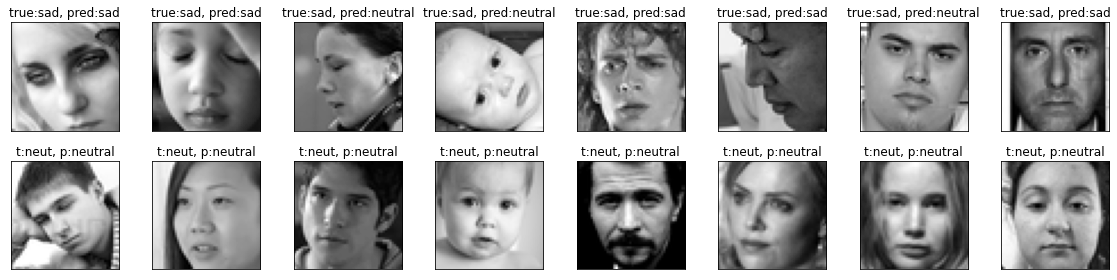

In [19]:
# using the loaded model to make predictions
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=8)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2]==1)[0], size=8)

fig = pyplot.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
        ax = pyplot.subplot(2, 9, i+1)
        sample_img = X_valid[sadidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"true:sad, pred:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,1)))]}")

        ax = pyplot.subplot(2, 9, i+10)
        sample_img = X_valid[neuidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"t:neut, p:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,1)))]}")

        pyplot.tight_layout()